## Análisis de datos - Clase 4

### Desbalance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [23]:
# Cargar dataset Titanic
df = sns.load_dataset("titanic")[["sex", "class", "embark_town","age", "fare", "survived"]].dropna()
df.head()

,sex,class,embark_town,age,fare,survived
0,male,Third,Southampton,22.0,7.2500,0
1,female,First,Cherbourg,38.0,71.2833,1
2,female,Third,Southampton,26.0,7.9250,1
3,female,First,Southampton,35.0,53.1000,1
4,male,Third,Southampton,35.0,8.0500,0


In [25]:
# Codificación
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["class"] = df["class"].map({"Third": 3, "Second": 2, "First": 1})
df = pd.get_dummies(df, columns=["embark_town"], drop_first=True)
df.head()

,sex,class,age,fare,survived,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,7.2500,0,False,True
1,1,1,38.0,71.2833,1,False,False
2,1,3,26.0,7.9250,1,False,True
3,1,1,35.0,53.1000,1,False,True
4,0,3,35.0,8.0500,0,False,True


### Entrenamiento con dataset original y datasest balanceados

#### Funciones auxiliares

In [4]:
# Función para calcular la entropía de Shannon
def shannon_entropy(y):
    probs = y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))


In [5]:
# Función para graficar la distribución de la variable target
def plot(y):
    fig, axes = plt.subplots(figsize=(4, 4))
    sns.countplot(x=y, hue=y, palette="Set2", ax=axes)
    
    axes.set_xlabel("Survived")
    axes.set_ylabel("Cantidad")
    axes.set_title(f"Distribución de la variable {target}")

    plt.tight_layout()
    plt.show()

In [6]:
# Evaluación del desbalance
def info(y):
    print("Proporción de clases:")
    print(y.value_counts(normalize=True))
    entropy = shannon_entropy(y)
    print("\nEntropía de Shannon:", entropy)
    plot(y)

#### Preparación de los datasets

In [26]:
# Separo el dataset en X (variables) y (target)
target = 'survived'
X = df.drop(columns=[target])
y = df[target]

Proporción de clases:
survived
0    0.764499
1    0.235501
Name: proportion, dtype: float64

Entropía de Shannon: 0.7874779996149458


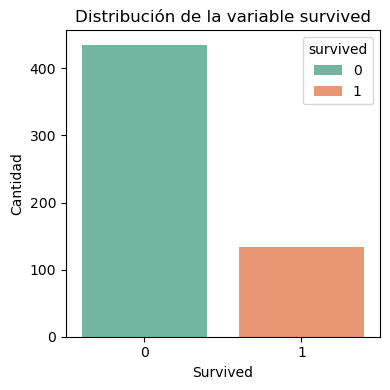

In [27]:
# Separa en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
info(y_train) # datos originales

Proporción de clases:
survived
1    0.5
0    0.5
Name: proportion, dtype: float64

Entropía de Shannon: 1.0


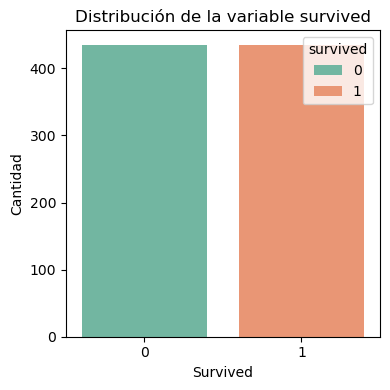

In [28]:
# Oversampling con SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
info(y_train_sm)

Proporción de clases:
survived
0    0.5
1    0.5
Name: proportion, dtype: float64

Entropía de Shannon: 1.0


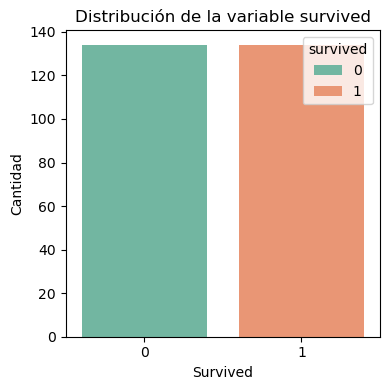

In [29]:
# Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)
info(y_train_us)

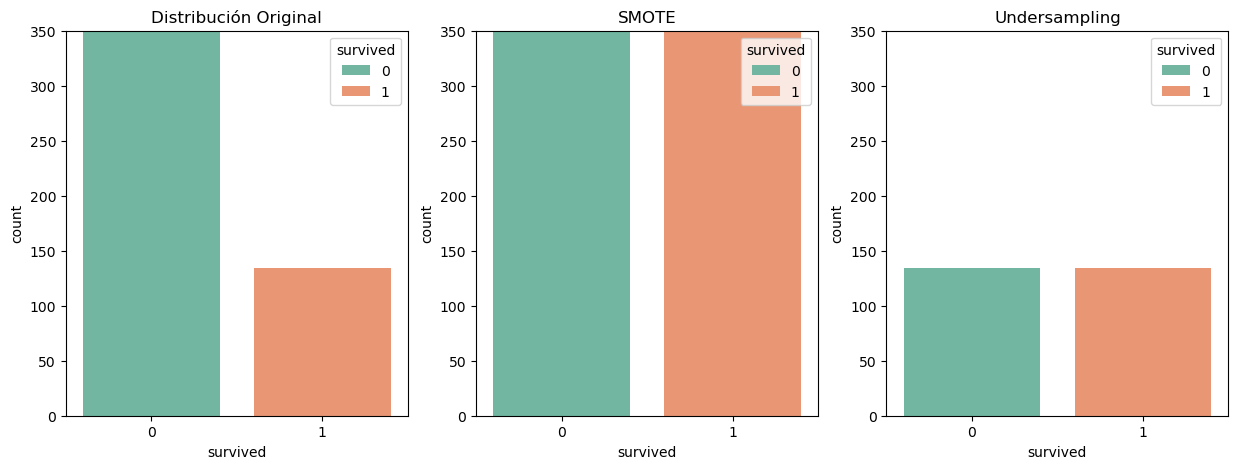

In [30]:
# Grafica las distribuciones original y balanceadas (para compararlas)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=y_train, hue=y_train, palette="Set2", ax=axes[0])
sns.countplot(x=y_train_sm, hue=y_train_sm, palette="Set2", ax=axes[1])
sns.countplot(x=y_train_us, hue=y_train_us, palette="Set2", ax=axes[2])

axes[0].set_title('Distribución Original')
axes[1].set_title('SMOTE')
axes[2].set_title('Undersampling')

for i in (0,1,2):
  axes[i].set_ylim(0,350)

plt.show()
